<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width=400px style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



We walk through a vanilla AutoEncoder on the MNIST dataset

First the imports

In [2]:
import torch
from torch.utils.data import DataLoader
from sklearn.mixture import GaussianMixture
from svlearn_autoencoders.auto_encoders.vanilla_auto_encoder_mnist import AutoencoderMnist
from svlearn_autoencoders.auto_encoders.auto_encoder_single_channel_util import (
                                                        train_autoencoder,
                                                        visualize_reconstruction,
                                                        get_latent_representations
)
from svlearn_autoencoders.auto_encoders.auto_encoder_util import (   sample_from_gmm,
                                                        generate_images_from_latent,
                                                        visualize_generated_images,
                                                        visualize_interpolations)
import torchvision.datasets as datasets

from svlearn_autoencoders import config
from svlearn.common.utils import ensure_directory

Load the path for mnist data and results

In [3]:

mnist_data_path = config['mnist-classification']['data']
ensure_directory(mnist_data_path)

In [4]:
mnist_trainset = datasets.MNIST(root=mnist_data_path, train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [5]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(eval_dataset, batch_size=128, shuffle=False)

Identify device (either cuda or cpu)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else device
device

'mps'

In [12]:
model = AutoencoderMnist().to(device)

Run training on the vanilla autoencoder

In [15]:
# Train autoencoder
train_autoencoder(model, train_loader, val_loader, num_epochs=10, learning_rate=1e-3, device=device)

Epoch [1/10], Train Loss: 0.0255, Val Loss: 0.0092, Current LR: 0.001
Epoch [2/10], Train Loss: 0.0075, Val Loss: 0.0064, Current LR: 0.001
Epoch [3/10], Train Loss: 0.0059, Val Loss: 0.0055, Current LR: 0.001
Epoch [4/10], Train Loss: 0.0051, Val Loss: 0.0050, Current LR: 0.001
Epoch [5/10], Train Loss: 0.0047, Val Loss: 0.0045, Current LR: 0.001
Epoch [6/10], Train Loss: 0.0043, Val Loss: 0.0042, Current LR: 0.001
Epoch [7/10], Train Loss: 0.0040, Val Loss: 0.0040, Current LR: 0.001
Epoch [8/10], Train Loss: 0.0038, Val Loss: 0.0038, Current LR: 0.001
Epoch [9/10], Train Loss: 0.0036, Val Loss: 0.0037, Current LR: 0.001
Epoch [10/10], Train Loss: 0.0035, Val Loss: 0.0036, Current LR: 0.0001


Visualize the reconstruction (top row being original images and bottom being reconstructed)

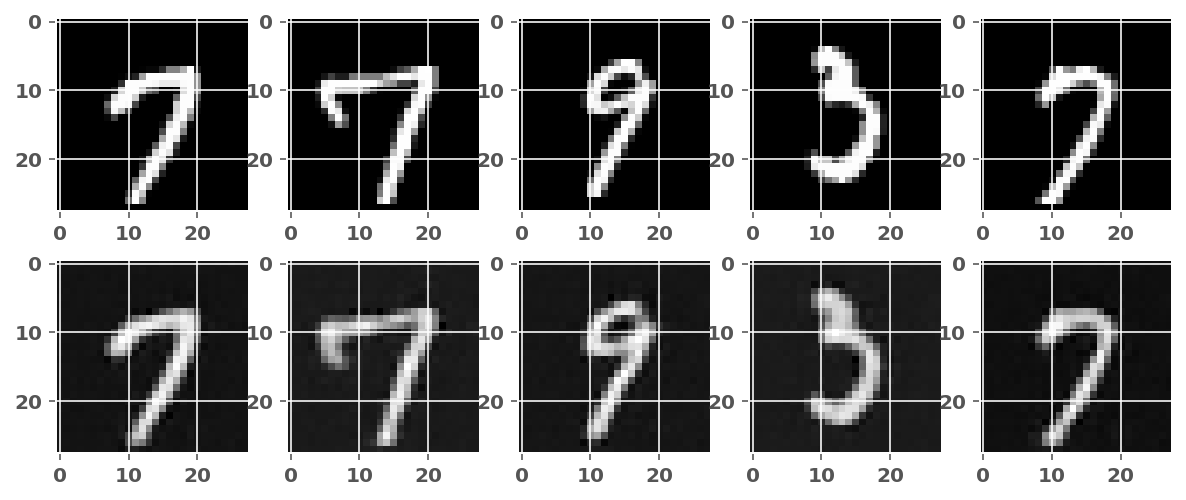

In [16]:
# Create random shuffles of the val loader to visualize different samples each time.
val_loader = DataLoader(eval_dataset, batch_size=128, shuffle=True) 
# Call this to monitor reconstruction
visualize_reconstruction(model, val_loader, device=device)

Generate images from hidden vectors using the decoder of the autoencoder

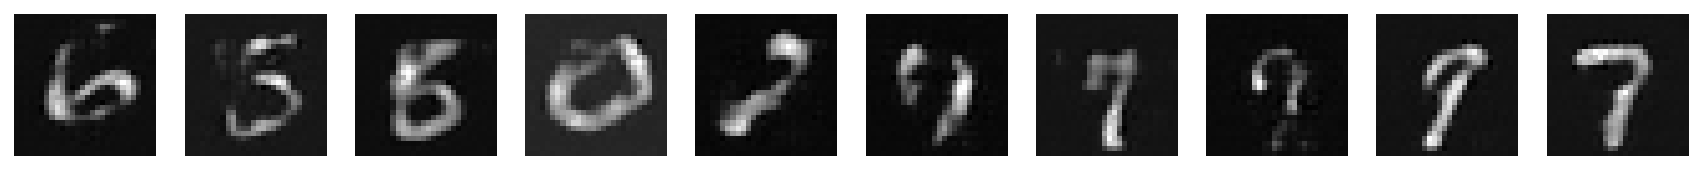

In [19]:

# Collect latent representations from training data
latent_data = get_latent_representations(model, train_loader, device=device)

# Fit a Gaussian Mixture Model with 10 components
gmm = GaussianMixture(n_components=10)
gmm.fit(latent_data)

# Sample from the GMM
latent_samples = sample_from_gmm(gmm, num_samples=10)

# Generate images from the latent samples
generated_images = generate_images_from_latent(model, latent_samples, device=device)

# Visualize the generated images
visualize_generated_images(generated_images)


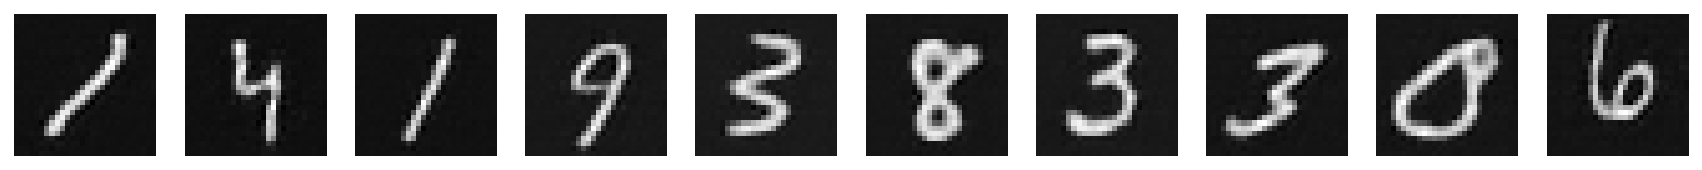

In [18]:
newly_sampled =latent_data[:10]
# Generate images from the latent samples
generated_images = generate_images_from_latent(model, newly_sampled, device=device)

# Visualize the generated images
visualize_generated_images(generated_images)

Visualize interpolations between the reconstruction of two images

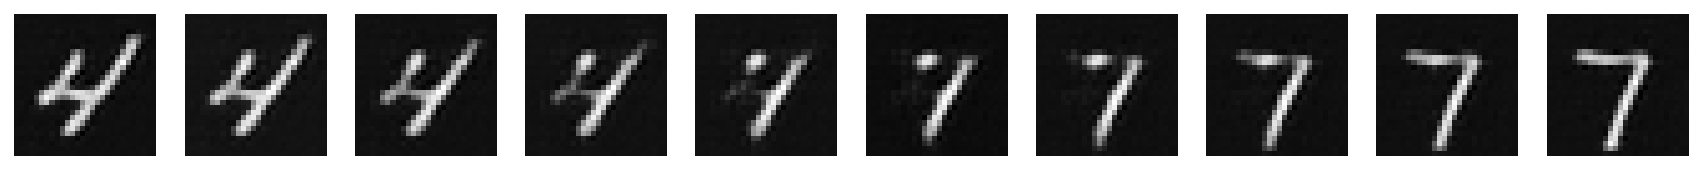

In [20]:

# Create random shuffle of train dataset to pick random 2 images every time.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
first_train_batch = next(iter(train_loader))
# Visualize interpolations
# Assuming image1 and image2 are samples from your dataset (PIL images already transformed to tensor)
image1 = first_train_batch[0]  # First image
image2 = first_train_batch[1]  # Second image

# Visualize interpolation between the two images
visualize_interpolations(model, image1, image2, num_steps=10, device=device)